Analysis for Credit Card Approval Project.
Combines Explanatory Data Analysis and Feature Engineering together.

In [1]:
# let's start by loading the dataset 
import pandas, numpy
import seaborn as sns 
import matplotlib.pyplot as plt

applications = pandas.read_csv("../../data/raw_data/application_record.csv")
credit_records = pandas.read_csv("../../data/raw_data/credit_record.csv")

In [2]:
applications

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
credit_records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


Renaming fields

In [4]:
# labeling data, presented in the credit records 

# Relabling Credit Records Dataset

CREDIT_MAPPING = {
    "ID": "client_id",
    "STATUS": "due_status",
    "MONTHS_BALANCE": "balance_month"
}
credit_records.rename(columns=CREDIT_MAPPING, inplace=True)

# Relabling Applications Records Dataset
APPLICATION_MAPPING = {
    "ID": "client_id",
    "CODE_GENDER": "gender",
    "FLAG_OWN_CAR": "has_car",
    "FLAG_OWN_REALTY": "has_realty",
    "CNT_CHILDREN": "total_children",
    "AMT_INCOME_TOTAL": "annual_income",
    "NAME_INCOME_TYPE": "income_category",
    "NAME_EDUCATION_TYPE": "education_category",
    "NAME_FAMILY_STATUS": "family_status",
    "NAME_HOUSING_TYPE": "living_place",
    "DAYS_BIRTH": "birthday",
    "FLAG_MOBIL": "has_mobile_phone",
    "FLAG_PHONE": "has_phone_number",
    "FLAG_WORK_PHONE": "has_work_phone",
    "FLAG_EMAIL": "has_email",
    "CNT_FAM_MEMBERS": "family_size",
    "OCCUPATION_TYPE": "job",
    'DAYS_EMPLOYED': 'days_employed',
}

applications.rename(columns=APPLICATION_MAPPING, inplace=True)


Null Values handling (Application Records)

In [5]:
applications.isnull().sum()

client_id                  0
gender                     0
has_car                    0
has_realty                 0
total_children             0
annual_income              0
income_category            0
education_category         0
family_status              0
living_place               0
birthday                   0
days_employed              0
has_mobile_phone           0
has_work_phone             0
has_phone_number           0
has_email                  0
job                   134203
family_size                0
dtype: int64

In [6]:
round(len(applications[applications['job'].isna()]) / len(applications), 2)

0.31

Imputing Job Feature

In [7]:
missing_job = 'missing'
applications['job'].fillna(value=missing_job, inplace=True)

Null Values Handling (Credit Records)

In [8]:
credit_records.isna().sum()

client_id        0
balance_month    0
due_status       0
dtype: int64

Handling outliers

In [9]:
numeric_features = applications.select_dtypes(include='number').columns
numeric_features

Index(['client_id', 'total_children', 'annual_income', 'birthday',
       'days_employed', 'has_mobile_phone', 'has_work_phone',
       'has_phone_number', 'has_email', 'family_size'],
      dtype='object')

Total Children

<Axes: xlabel='total_children'>

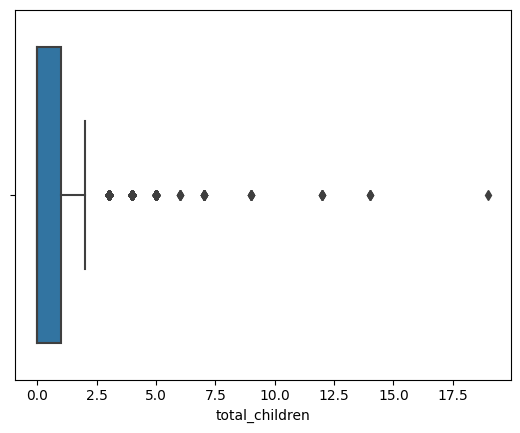

In [10]:
sns.boxplot(x=applications['total_children'])

In [11]:
low, high = numpy.percentile(applications['annual_income'], [25, 75])
iqr = (high - low)
low_fence, high_fence = low - (1.5 * iqr), high + (1.5 * iqr)

outliers = applications.loc[
    (applications["annual_income"] > high_fence) | (applications['annual_income'] < low_fence)
]


print('outliers: ', outliers.shape[0])
print('total samples: ', len(applications))



outliers:  19108
total samples:  438557


Family Size

<Axes: xlabel='family_size'>

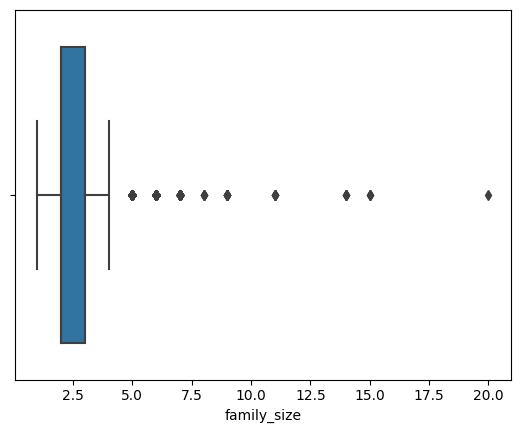

In [12]:
sns.boxplot(x=applications['family_size'])

In [13]:
applications[applications['days_employed'] < 0]

,client_id,gender,has_car,has_realty,total_children,annual_income,income_category,education_category,family_status,living_place,birthday,days_employed,has_mobile_phone,has_work_phone,has_phone_number,has_email,job,family_size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,missing,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,missing,2.0
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0


Feature Engineering

Application Record Features

In [14]:
import math 

applications = applications.drop_duplicates(subset=["client_id"], keep='last', inplace=False)

applications['age'] = applications['birthday'].apply(lambda day: math.floor(abs(day) / 365))

applications['working_years'] = applications['days_employed'].apply(
    lambda days: math.floor(abs(days) // 365)
)

applications['emp_stability'] = applications[
    ['working_years', 'days_employed']
].apply(lambda df: True if (df['working_years'] >= 5 and df['days_employed'] < 0) else False, axis=1)

applications['has_children'] = applications['total_children'].apply(lambda children: True if children > 0 else False)

applications['owns_realty_and_car'] = numpy.where( 
    (applications['has_car'] == 'Y') & (applications['has_realty'] == 'Y'), True, False
)

applications['has_contact_information'] = numpy.where(
    (
        applications['has_email'] == 1
    ) 
    | (
        applications['has_phone_number'] == 1
    )
    | (
        applications['has_work_phone'] == 1
    ), True, False
)

/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_41548/4220393781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applications['age'] = applications['birthday'].apply(lambda day: math.floor(abs(day) / 365))
/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_41548/4220393781.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applications['working_years'] = applications['days_employed'].apply(
/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_41548/4220393781.py:11: SettingWith

Processing Credit Records dataset

In [15]:
# Cleansing credit records dataset

DUE_DATATYPES = {
    "0": 0,
    "1": -1,
    "2": -2,
    "3": -3,
    "4": -4,
    "5": -5,
    "X": 0,
    "C": 0,
}

credit_records['due_score'] = credit_records['due_status'].map(lambda item: DUE_DATATYPES[item])
credit_records['balance_month'] = credit_records['balance_month'].apply(func=lambda item: abs(item) + 1)
credit_records = credit_records[['client_id', 'balance_month', 'due_score']]

credit_records

,client_id,balance_month,due_score
0,5001711,1,0
1,5001711,2,0
2,5001711,3,0
3,5001711,4,0
4,5001712,1,0
...,...,...,...
1048570,5150487,26,0
1048571,5150487,27,0
1048572,5150487,28,0
1048573,5150487,29,0


Credit Record Features

overdue_score - number of ovedues made by client divided by the total credit window
credit

In [16]:
# introducing credit records features (bad client status)

credit_features = pandas.DataFrame()

credit_windows = credit_records.groupby('client_id')['balance_month'].agg('max').to_frame('credit_window').reset_index()

credit_features['client_id'] = credit_records['client_id'].unique()


credit_features['overdue_score'] = credit_records.groupby(by='client_id')['due_score'].sum().to_numpy()

# number of overdues per client 

overdue_groups = credit_records[
        credit_records['due_score'] < 0
].groupby(by='client_id')['due_score'].count().to_frame("total_overdues").reset_index()


credit_features = credit_features.merge(overdue_groups, on='client_id', how='left')
credit_features['total_overdues'].fillna(0, inplace=True)

overdues = credit_records[credit_records['due_score'] < 0][['client_id', 'balance_month']]

# merging with credit window table
credit_features = credit_features.merge(credit_windows, how='inner', on='client_id')

# annotating bad client status
credit_features = credit_features[['client_id', 'credit_window', 'overdue_score', 'total_overdues']]

credit_features 


,client_id,credit_window,overdue_score,total_overdues
0,5001711,4,0,0.0
1,5001712,19,0,0.0
2,5001713,22,0,0.0
3,5001714,15,0,0.0
4,5001715,60,0,0.0
...,...,...,...,...
45980,5150482,29,0,0.0
45981,5150483,18,0,0.0
45982,5150484,13,0,0.0
45983,5150485,2,0,0.0


Finding average distance between overdues per client

In [17]:
overdues['changes'] = overdues.groupby(by='client_id')['balance_month'].transform(
    func=lambda month: month - month.shift(1)
).fillna(0)

overdues = overdues.groupby(by='client_id')['changes'].agg('mean').to_frame("avg_overdue_change").reset_index()
overdues


,client_id,avg_overdue_change
0,5001718,2.000000
1,5001720,2.142857
2,5001757,0.000000
3,5001786,0.000000
4,5001792,2.000000
...,...,...
5345,5150412,1.000000
5346,5150417,0.000000
5347,5150459,0.800000
5348,5150463,0.666667


In [18]:
features = credit_features.merge(overdues, on='client_id', how='left')

# filling missing values (users, who have brilliant credit history does not have overdues, hence )
features.fillna({
    'balance_month': 0,
    'changes': 0,
    'total_overdues': 0,
    'avg_overdue_change': 0,
}, inplace=True)

features['severe_score'] = abs(features['overdue_score'])

features['overdue_ratio'] = features['total_overdues'] / features['credit_window']

features = features[
    [
    'client_id', 'credit_window', 
    'total_overdues', 'avg_overdue_change', 
    'severe_score', 'overdue_ratio'
    ]
]
    
features

,client_id,credit_window,total_overdues,avg_overdue_change,severe_score,overdue_ratio
0,5001711,4,0.0,0.0,0,0.0
1,5001712,19,0.0,0.0,0,0.0
2,5001713,22,0.0,0.0,0,0.0
3,5001714,15,0.0,0.0,0,0.0
4,5001715,60,0.0,0.0,0,0.0
...,...,...,...,...,...,...
45980,5150482,29,0.0,0.0,0,0.0
45981,5150483,18,0.0,0.0,0,0.0
45982,5150484,13,0.0,0.0,0,0.0
45983,5150485,2,0.0,0.0,0,0.0


In [19]:
sus_clients = features[features['severe_score'] > 0]

Analyzing how severe score increases, based on the credit window

Text(0.5, 0, 'Credit Window (Month)')

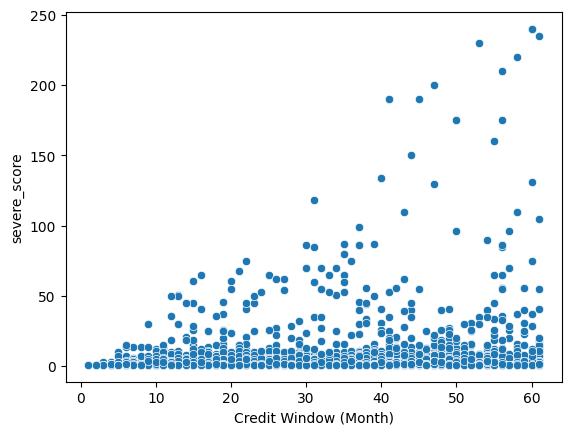

In [20]:
sns.scatterplot(y=sus_clients['severe_score'], x=sus_clients['credit_window'])
plt.xlabel("Credit Window (Month)")

Analyzining threshold for average overdue change ratio

Text(0.5, 0, 'Credit Window (Month)')

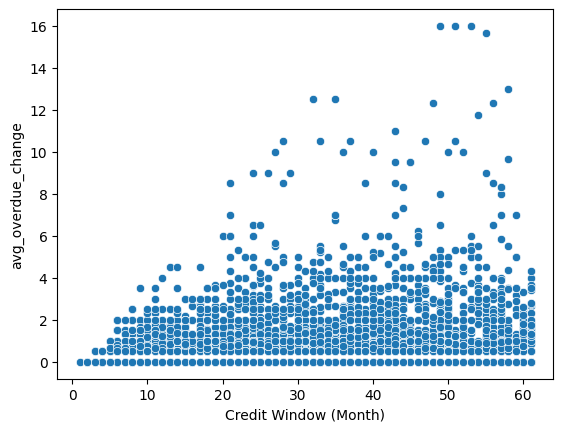

In [21]:
sns.scatterplot(y=sus_clients['avg_overdue_change'], x=sus_clients['credit_window'])
plt.xlabel("Credit Window (Month)")

Analyzing Distribution of percentage of overdues, based on the credit window

Text(0.5, 0, 'Credit Window (Month)')

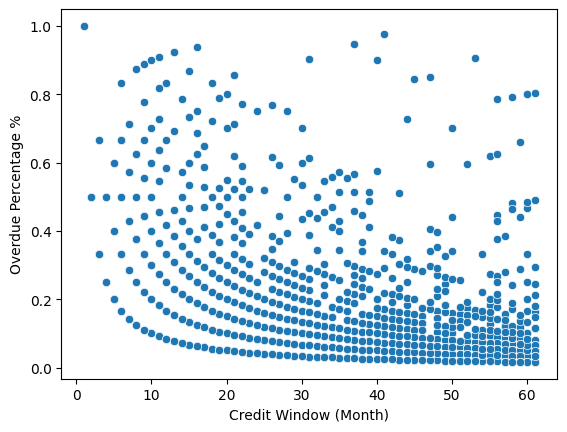

In [22]:
sns.scatterplot(x=sus_clients['credit_window'], y=sus_clients['overdue_ratio'])
plt.ylabel("Overdue Percentage %")
plt.xlabel("Credit Window (Month)")

Marking clients as bad, based on feature combinations (severe score + period between overdues)

People, who has low time frame between each overdue can be considered as unstable 
because such high frequency might be an indicator of disability to pay. 

Clients, who has some overdues but make them rarely, conversely can be considered as reliable.
Because rare overdues may happen due to touch economy inside the country or some other circumstances, that caused financial dificit.

True - client is bad 
False - client is stable

Crucial Features: 

total overdue score - calculated, based on the severe of overdue (see above)

"Severe Score" - abs(total overdue score)

"Period between overdues" - time period between each adjacent overdues


In [23]:
avg_overdue_change_threshold = 0.03
severe_score_threshold = 20
overdue_percentage_ratio_threshold = 0.3
max_overdue_percentage_ratio = 0.5
number_of_overdues_threshold = 3

def detect_bad_client(df_row):
    """
    Function detects whether client is good or bad, based on the 
    following criterias:

    1. total_overdues - total number of overdues 
    2. overdue_score - severity of overdues 
    3. overdue_change_ratio - average number of month between each overdue
    
    Thresholds are given above. 

    Args:
        df_row: pandas.DataFrame object, containing criterias
    
    Returns:
        bool:
            True - client is unreliable 
            False - client is responsible
    """
    if df_row['total_overdues'] == 0: return False

    return any([
        (df_row['overdue_ratio'] >= max_overdue_percentage_ratio),
        (df_row['avg_overdue_change'] <= avg_overdue_change_threshold and df_row['overdue_ratio'] >= overdue_percentage_ratio_threshold),
        (
            df_row['severe_score'] >= severe_score_threshold and
            df_row['total_overdues'] >= number_of_overdues_threshold and
            df_row['avg_overdue_change'] <= avg_overdue_change_threshold
        ),
        (
            df_row['severe_score'] >= severe_score_threshold and
            df_row['total_overdues'] >= number_of_overdues_threshold and
            df_row['overdue_ratio'] >= overdue_percentage_ratio_threshold
        )
    ])

features['bad_client'] = features.apply(func=detect_bad_client, axis=1)

Merging tables together

In [24]:
merged_dataset = applications.merge(features, on='client_id', how='inner')

merged_dataset

,client_id,gender,has_car,has_realty,total_children,annual_income,income_category,education_category,family_status,living_place,...,emp_stability,has_children,owns_realty_and_car,has_contact_information,credit_window,total_overdues,avg_overdue_change,severe_score,overdue_ratio,bad_client
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,True,False,True,True,16,1.0,0.000000,1,0.062500,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,True,False,True,True,15,1.0,0.000000,1,0.066667,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,True,False,30,0.0,0.000000,0,0.000000,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,True,False,False,True,5,0.0,0.000000,0,0.000000,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,True,False,False,True,27,0.0,0.000000,0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,True,False,True,False,12,4.0,1.250000,19,0.333333,False
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,False,False,False,True,24,18.0,0.944444,53,0.750000,True
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,False,False,False,True,33,18.0,0.944444,53,0.545455,True
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,False,10,2.0,0.500000,3,0.200000,False


Saving labeled data using pandas

In [25]:
merged_dataset.to_csv("../../data/labeled_data/labeled_data.csv")


Proportion of total overdues

Proportion of people per income category who are "bad_clients"

In [26]:
bad_clients = merged_dataset[merged_dataset['bad_client'] == True]

In [27]:
props = bad_clients.groupby(by='income_category').agg(total_bad=('client_id', 'count')).reset_index()
props

,income_category,total_bad
0,Commercial associate,65
1,Pensioner,40
2,State servant,10
3,Working,97


In [28]:
props_per_cat = props.pivot(columns='income_category', values='total_bad')

/Users/kirillklimushin/Desktop/credit_card_approval/fn_envr/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='income_category'>

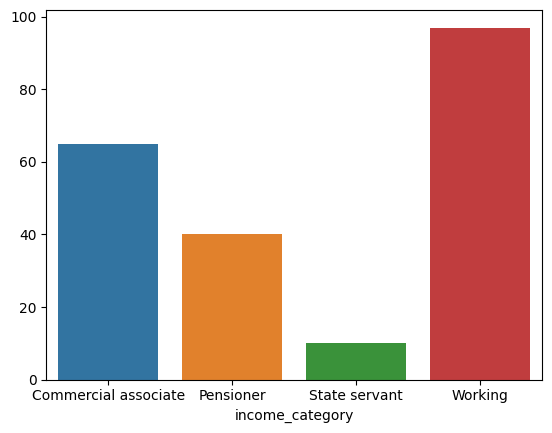

In [29]:
sns.barplot(props_per_cat)

Conclusion:
    Category of 'Working' people presents the highest number of potentially bad clients, in contrast
    with other categories in the list of income categories.

Days, that has the most number of overdues

Overdues might be caused due to particular number of days, 
since credit card has been approved 

In [30]:
month = credit_records.pivot(index='client_id', columns='balance_month', values='due_score')

In [31]:
month.fillna(value=0, inplace=True)

In [32]:
month

balance_month,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
client_id,,,,,,,,,,,,,,,,,,,,,
5001711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5150484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
overdue_per_day = credit_records.groupby('balance_month').agg(total_overdues=('due_score', 'sum')).reset_index()

Filtering days, based on the number of overdues